In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import seaborn as sns
import math 
from sklearn.decomposition import PCA

In [64]:
# Importing the dataset
dataset = pd.read_csv("/content/drive/MyDrive/Copy of dataset_1.csv", header = None,sep = "\t")
train_data = dataset.iloc[:, :].values
train_dataX = train_data[:,0:64]
train_dataY = train_data[:,64]

In [65]:
# class LDA
class LDA:
    def __init__(self,train_dataX,train_dataY):
        self.train_dataX = train_dataX
        self.train_dataY = train_dataY
        self.classes = np.unique(train_dataY)
        self.no_of_classes = len(self.classes)
        self.D = train_dataX.shape[1]
        self.overall_mean = np.mean(train_dataX, axis = 0)
    
    def SeperatingClasswise(self,train_dataX, train_dataY):
        class_data = [[] for i in range(self.no_of_classes)]
        for i in range(0,self.no_of_classes):
            for j in range(0,len(train_dataY)):
                if train_dataY[j] == i:
                    class_data[i].append(train_dataX[j])
        return class_data
    
    def CalculatingMeanClass(self,class_data):
        mean_class = [[] for i in range(self.no_of_classes)]
        for i in range(self.no_of_classes):
            mean_class[i] = np.mean(class_data[i], axis = 0)
        return mean_class
    
    def Sw_matrix(self,class_data, mean_class):
        scatter_matrix = [[] for i in range(self.no_of_classes)]
        for i in range(self.no_of_classes):
            scatter_matrix[i] = np.zeros((self.D,self.D))
            for j in range(len(class_data[i])):
                x = class_data[i][j].reshape(self.D,1) - mean_class[i].reshape(self.D,1)
                scatter_matrix[i] += (x).dot(x.T)
        Sw = np.zeros((self.D,self.D))
        for i in range(self.no_of_classes):
            Sw += scatter_matrix[i]
        return Sw
    
    def Sb_matrix(self,mean_class, overall_mean, class_data):
        scatter_matrix = np.zeros((self.D,self.D))
        for i in range(self.no_of_classes):
            n = len(class_data[i])
            mean_diff = mean_class[i].reshape(self.D,1) - overall_mean.reshape(self.D,1)
            scatter_matrix += n * (mean_diff).dot(mean_diff.T)
        return scatter_matrix
    
    def inverse_Sw(self,Sw):
        Sw_inv = np.linalg.pinv(Sw)
        return Sw_inv
    
    def EigenFunction(self,Sw_inv, Sb):
        eigen_values, eigen_vectors = np.linalg.eig(Sw_inv.dot(Sb))
        return eigen_values, eigen_vectors
    
    def Sorting_Eigenvalues(self,eigen_values, eigen_vectors):
        idx = eigen_values.argsort()[::-1]
        eigen_values = eigen_values[idx]
        eigen_vectors = eigen_vectors[:,idx]
        return eigen_values, eigen_vectors
    
    def Projecting_Data(self,W, train_dataX):
        projected_data = W.T.dot(train_dataX.T)
        return projected_data
    
    def remove_zero_variance(self,train_dataX):
        new_data = []
        new_data = np.array(new_data)
        cnt = 0
        for i in range(0,train_dataX.shape[1]):
            if np.var(train_dataX[:,i]) != 0 and cnt == 1:
                new_data = np.c_[new_data, train_dataX[:,i]]
            if np.var(train_dataX[:,i]) != 0 and cnt == 0:
                new_data = train_dataX[:,i]
                cnt = 1
        
        self.D = new_data.shape[1]
        self.overall_mean = np.mean(new_data, axis = 0)
        
        return new_data
    
    # zero mean and unit variance normalization of data 
    def Standardizing_Data(self,train_dataX):
        standardized_data = (train_dataX - np.mean(train_dataX, axis = 0))/np.std(train_dataX, axis = 0)
        
        self.overall_mean = np.mean(standardized_data, axis = 0)
        self.D = standardized_data.shape[1]

        return standardized_data
    
    def Plotting_Data(self,projected_data, train_dataY):
        plt.figure(figsize=(10,10))
        plt.title("LDA")
        plt.xlabel("X")
        plt.ylabel("Y")
        plt.scatter(projected_data[0,:], projected_data[1,:], c = train_dataY)
        plt.show()

Without Deleting any Columns in the orginal data 

/usr/local/lib/python3.10/dist-packages/matplotlib/collections.py:192: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


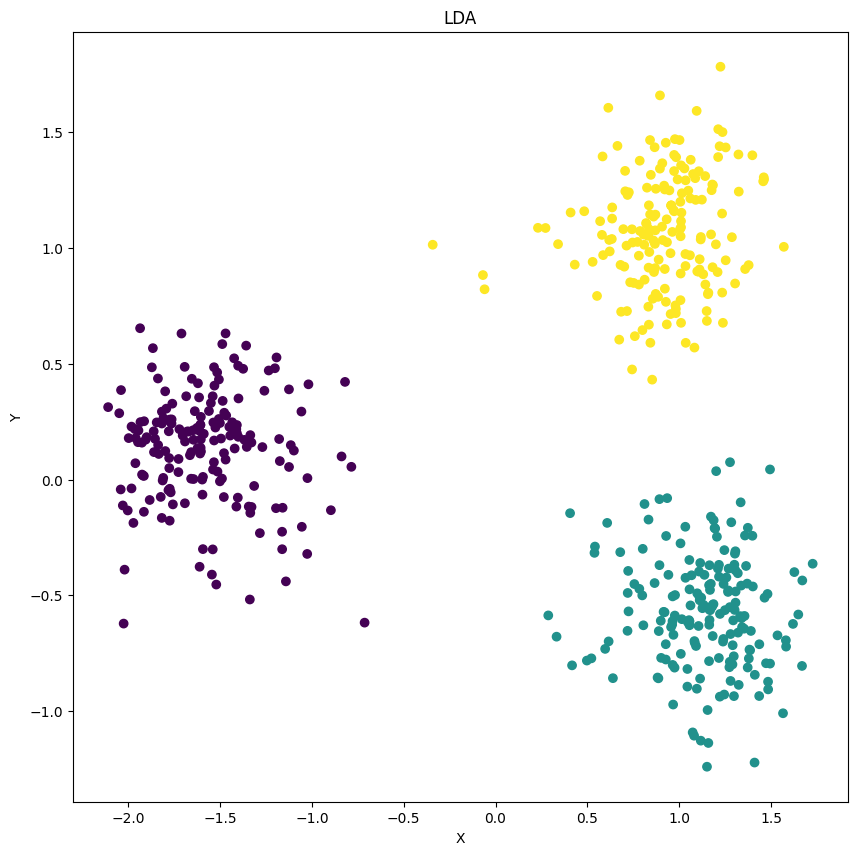

In [66]:
LDA_normal = LDA(train_dataX, train_dataY)
class_data = LDA_normal.SeperatingClasswise(train_dataX, train_dataY)
mean_class = LDA_normal.CalculatingMeanClass(class_data)
Sw = LDA_normal.Sw_matrix(class_data, mean_class)
Sb = LDA_normal.Sb_matrix(mean_class, LDA_normal.overall_mean, class_data)
Sw_inv = LDA_normal.inverse_Sw(Sw)
eigen_values, eigen_vectors = LDA_normal.EigenFunction(Sw_inv, Sb)
eigen_values, eigen_vectors = LDA_normal.Sorting_Eigenvalues(eigen_values, eigen_vectors)
W = eigen_vectors[:,0:2]
projected_data = LDA_normal.Projecting_Data(W, train_dataX)
LDA_normal.Plotting_Data(projected_data, train_dataY)

After Deleting Columns with variance of column = 0

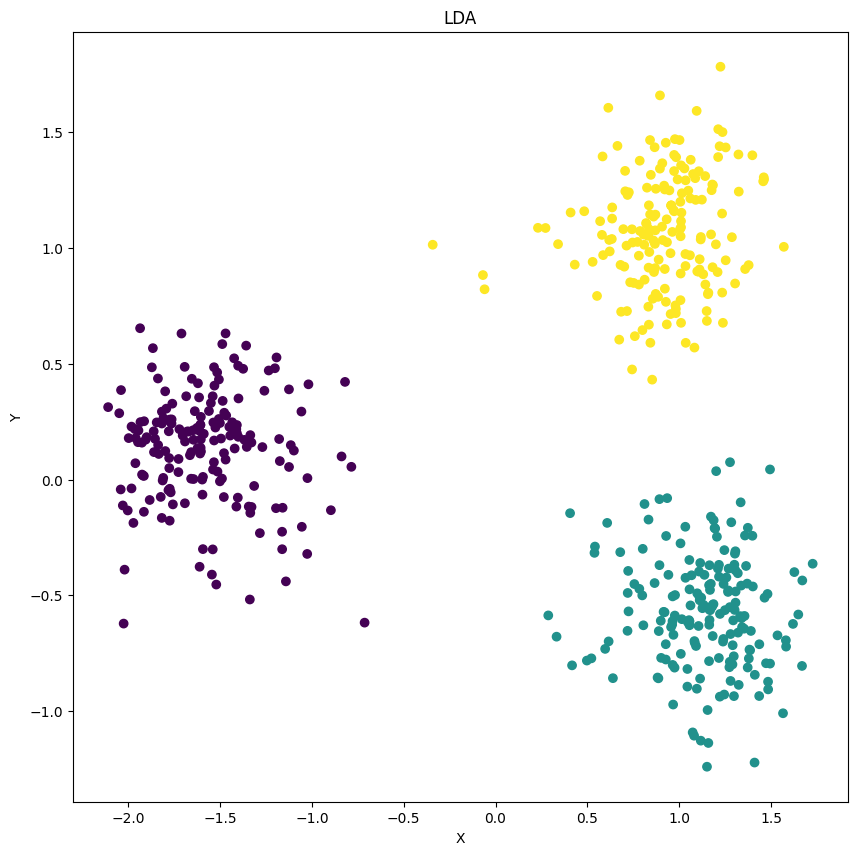

In [67]:
LDA_normal1 = LDA(train_dataX, train_dataY)
train_dataX1 = LDA_normal1.remove_zero_variance(train_dataX)
class_data1 = LDA_normal1.SeperatingClasswise(train_dataX1, train_dataY)
mean_class1 = LDA_normal1.CalculatingMeanClass(class_data1)
Sw1 = LDA_normal1.Sw_matrix(class_data1, mean_class1)
Sb1 = LDA_normal1.Sb_matrix(mean_class1, LDA_normal1.overall_mean, class_data1)
Sw_inv1 = LDA_normal.inverse_Sw(Sw1)
eigen_values1, eigen_vectors1 = LDA_normal1.EigenFunction(Sw_inv1, Sb1)
eigen_values1, eigen_vectors1 = LDA_normal1.Sorting_Eigenvalues(eigen_values1, eigen_vectors1)
eigen_vectors1 = eigen_vectors1
W1 = eigen_vectors1[:,0:2]
projected_data1 = LDA_normal1.Projecting_Data(W1, train_dataX1)
LDA_normal1.Plotting_Data(projected_data1, train_dataY)

After Zero Mean, Unit Variance Normalization 

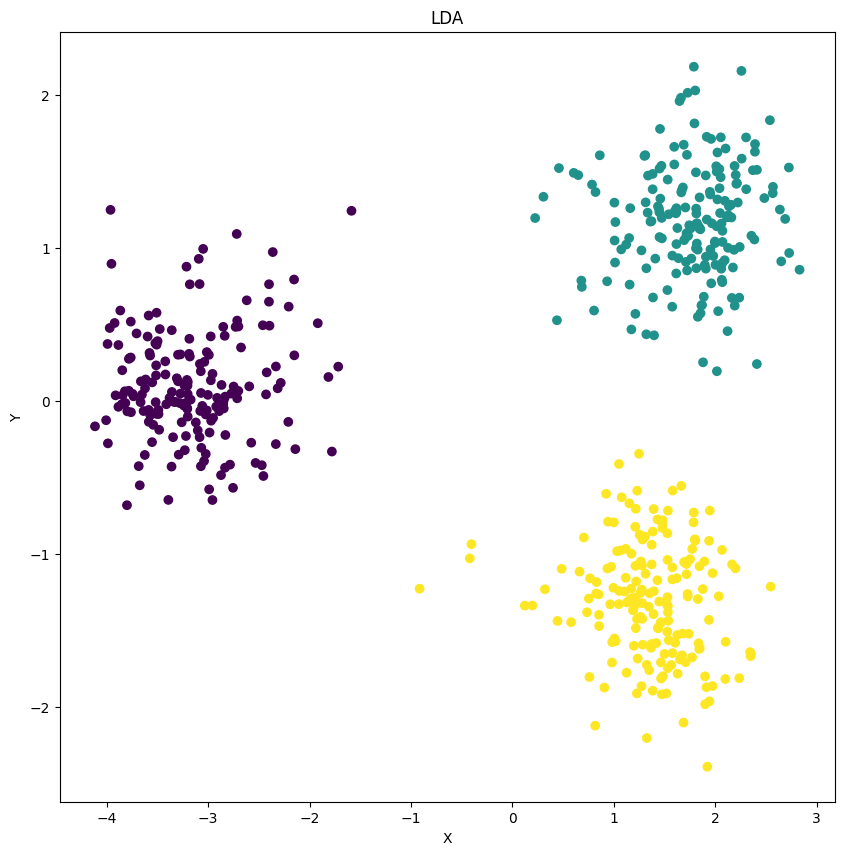

In [68]:
LDA_STD= LDA(train_dataX, train_dataY)
standardized_data1 = LDA_STD.remove_zero_variance(train_dataX)
standardized_dataS = LDA_STD.Standardizing_Data(standardized_data1)
class_dataS = LDA_STD.SeperatingClasswise(standardized_dataS, train_dataY)
mean_classS = LDA_STD.CalculatingMeanClass(class_dataS)
SwS= LDA_STD.Sw_matrix(class_dataS, mean_classS)
SbS = LDA_STD.Sb_matrix(mean_classS, LDA_STD.overall_mean, class_dataS)
Sw_invS = LDA_STD.inverse_Sw(SwS)
eigen_valuesS, eigen_vectorsS= LDA_STD.EigenFunction(Sw_invS, SbS)
eigen_valuesS, eigen_vectorsS= LDA_STD.Sorting_Eigenvalues(eigen_valuesS, eigen_vectorsS)
WS = eigen_vectorsS[:,0:2]
projected_dataS = LDA_STD.Projecting_Data(WS, standardized_dataS)
LDA_STD.Plotting_Data(projected_dataS.real, train_dataY)

Part (C) Of Question 1

In [69]:
Shuffling_Data  = np.c_[projected_data.T, train_dataY]
np.random.shuffle(Shuffling_Data)
BayesTrainData = Shuffling_Data[0:int(0.8*len(Shuffling_Data)),:]
BayesTestData = Shuffling_Data[int(0.8*len(Shuffling_Data)):,:]

print("Shuffled Data: ", Shuffling_Data.shape)
print("Bayes Test Data: ", BayesTestData.shape)
print("Bayes Train Data: ", BayesTrainData.shape)

Shuffled Data:  (537, 3)
Bayes Test Data:  (108, 3)
Bayes Train Data:  (429, 3)


In [70]:
def build_model(Q,train_data,test_data):

  P = len(train_data[0])-1
  N = len(train_data)
  s = set()
  for i in range(N):
    s.add(train_data[i][2])
  C = len(s)
  
  def variance(ls):
    avg = sum(ls) / len(ls)
    variance = sum(map(lambda x: ((x-avg) ** 2), ls))/float(len(ls))
    return variance

  def covar_matrix(C,P,data):
    r = []
    for k in range(C):
        m = []
        for i in range(P):
            v = []
            for j in range(P):
                if(i == j):
                    v.append(variance(data[k][:,i]))
                else:
                    v.append(0)
            m.append(np.array(v))
        r.append(np.array(m))
    return r

  def Total_Variance(P,data):
    m = []
    for i in range(P):
        v = []
        for j in range(P):
            if(i == j):
                v.append(variance(data[:,i]))
            else:
                v.append(0)
        m.append(np.array(v))
    return m

  def classification(data,c):
    classf = []
    Nf = len(data)
    for j in range(c):
        m = []
        for i in range(Nf):
            if(data[i][2] == j):
                m.append(data[i][0:2])
        classf.append(np.array(m))
    return classf

  def probability_class(C,train_class):
    prob_class = []  
    for i in range(C):
        p = len(train_class[i])/N
        prob_class.append(p)
    return prob_class
  
  def covar_make(a,C):
    r = []
    for i in range(C):
      r.append(a)
    return r


  train_class = classification(train_data,C)
  prob_class = probability_class(C,train_class)

  covariance_matrix = np.array([])

  if(Q == 3):
    covariance_matrix = np.array(covar_matrix(C,P,train_class))
  elif(Q == 1):
    r = np.array([1,0,0,1]).reshape(2,2)
    covariance_matrix = np.array(covar_make(r,C))
  else:
    r = Total_Variance(P,train_data)
    covariance_matrix = np.array(covar_make(r,C))

  def mean_function(class_arr):
    l = len(class_arr)
    sum = 0
    m = []
    for j in range(P):
        sum = 0
        for i in range(l):
            sum += (class_arr[i][j])
        m.append(sum/l)
    return np.array(m) 

  def GaussianD(mean,covar,x):
    arr = (x-mean)
    t = arr.reshape(len(arr),1)
    p = (1/math.sqrt(((2*math.pi)**P)*(np.linalg.det(covar)))) * math.exp((-1)*0.5 * np.dot(np.dot(np.transpose(t),np.linalg.inv(covar)),t))
    return p

  def GaussianPC(x):
    listc = []
    maxv = 0
    ans = -1
    for i in range(C):
        p = GaussianD(mean_function(train_class[i]),covariance_matrix[i],x)
        h = p * prob_class[i]
        if i == 0:
            maxv = h
        else:
            maxv = max(maxv,h)
        listc.append((h,i))
    
    for i in range(len(listc)):
        if(listc[i][0] >= maxv):
            ans = i
            break
    return ans

  def Accuracy(td):
    sum = 0
    Nt = len(td)
    for i in range(Nt):
        class_x = GaussianPC(td[i][0:2])
        if(class_x == td[i][2]):
            sum += 1
    return ((sum/Nt)*100,100 - (sum/Nt)*100)

  def predicte(td):
    Nt = len(td)
    predicted = []
    for i in range(Nt):
        m = []
        class_x = GaussianPC(td[i][0:2])
        for j in range(P):
            m.append(td[i][j])
        m.append(class_x)
        predicted.append(np.array(m))
    return np.array(predicted)
  
  def confusion_matrix(predict,original):
    n = len(np.unique(np.array(predict)))
    x = np.zeros((n,n))
    for i in range(len(predict)):
      x[int(original[i])][int(predict[i])]+=1
    return x
   
  def plot(predicte,train_data,test_data):
    plt.figure(figsize=(10,10))
    plt.xlabel("x")
    plt.ylabel("y")
    x_min,x_max = train_data[:,0].min()-0.01, train_data[:,0].max()+0.01
    y_min,y_max = train_data[:,1].min()-0.01, train_data[:,1].max()+0.01
    
    xx,yy = np.meshgrid(np.arange(x_min,x_max,0.025),np.arange(y_min,y_max,0.025))
    z = predicte(np.c_[xx.ravel(),yy.ravel()])[:,2]
    z = z.reshape(xx.shape)
    plt.contourf(xx, yy, z)

    sns.scatterplot(x = test_data[:,0], y = test_data[:,1], hue = test_data[:,2])
    plt.xlim(xx.min(),xx.max())
    plt.ylim(yy.min(),yy.max())
    
    plt.title("Naive Bayes Classifier for test data")
    plt.show()

  predicted_test= predicte(test_data)
  predicted_train = predicte(train_data)

  print("Accuracy of test data",Accuracy(test_data))
  print("Accuracy of train data",Accuracy(train_data))
  plot(predicte,train_data,test_data)

  # confusion matrices of test and train data
  a = confusion_matrix(predicted_train[:,2], train_data[:,2])
  b = confusion_matrix(predicted_test[:,2],test_data[:,2])
  fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10,4))
  ax1.set_title('train confusion matrix')
  ax2.set_title('test confusion matrix')
  sns.heatmap(a, ax=ax1, annot=True, fmt='g')
  sns.heatmap(b, ax=ax2, annot=True)

shape of train data (108, 3)
shape of test data (429, 3)
Accuracy of test data (100.0, 0.0)
Accuracy of train data (100.0, 0.0)


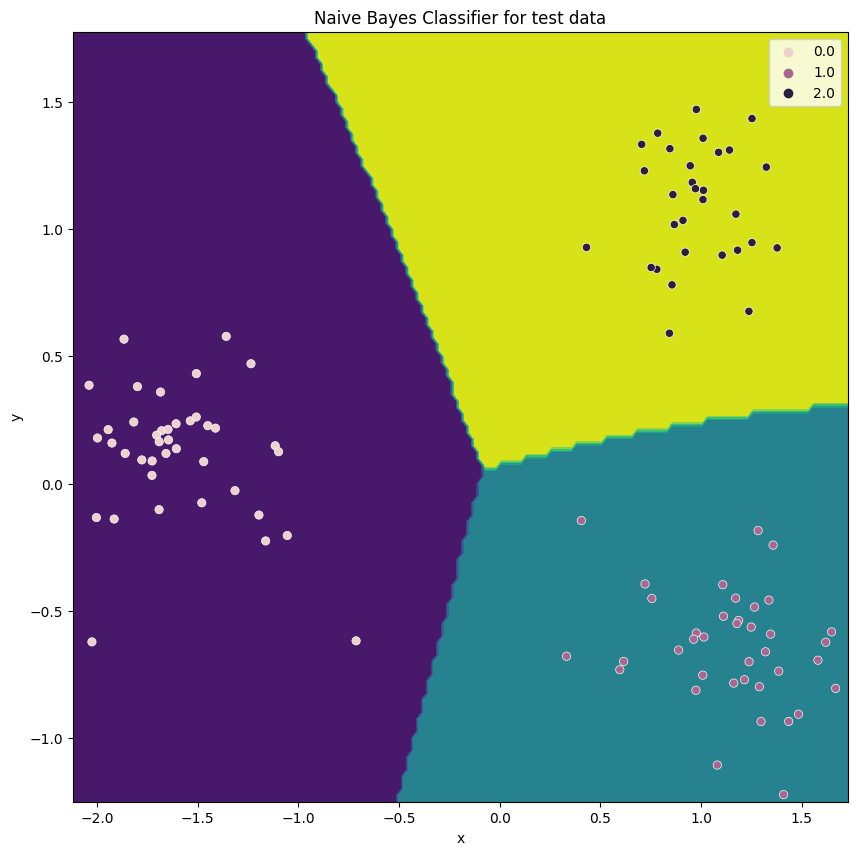

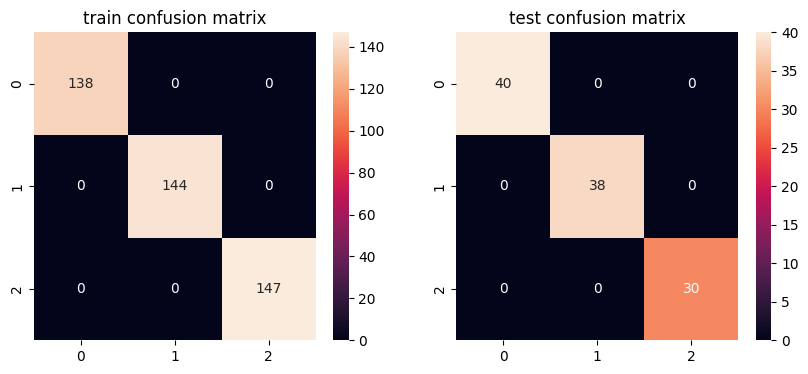

In [71]:
print("shape of train data",BayesTestData.shape)
print("shape of test data",BayesTrainData.shape)
build_model(3,BayesTrainData.real,BayesTestData.real)

(B) Part of Question 1

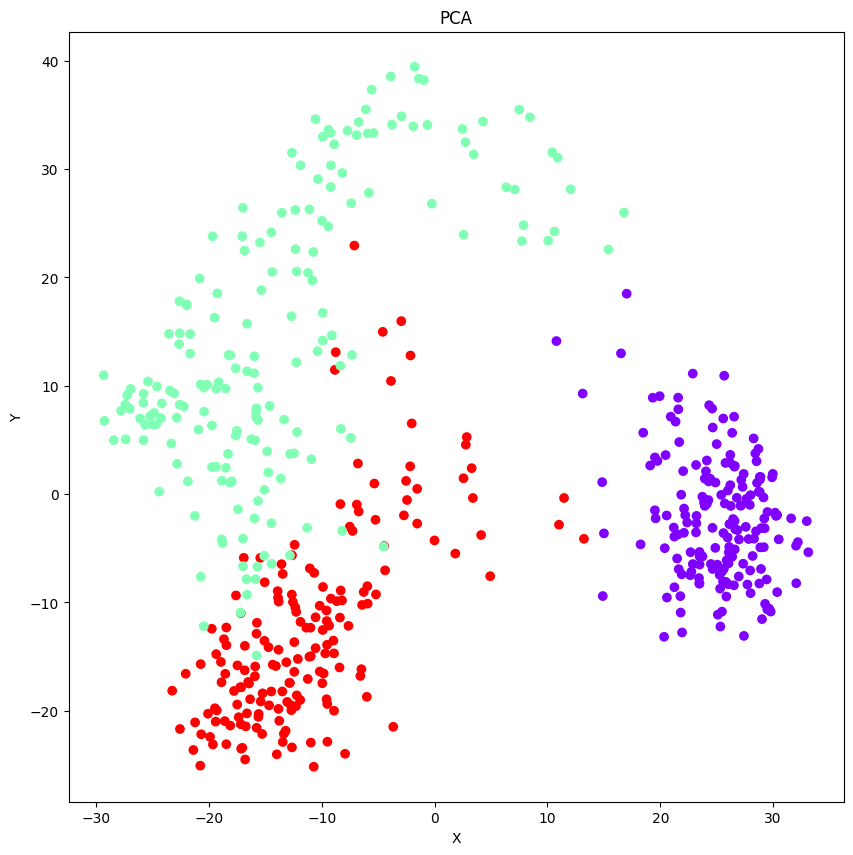

In [72]:

#standardize data 
overall_mean = np.mean(train_dataX,axis = 0)
def StandardingUsingMean(train_dataX,mean):
    standardizeddata = []
    for i in range(len(train_dataX)):
        standardizeddata.append(train_dataX[i] - mean)
    return np.array(standardizeddata)

standardized_data = StandardingUsingMean(train_dataX,overall_mean)

# Instantiate PCA with the desired number of components
pca = PCA(n_components=2)

# Fit the standardized data to the PCA model and transform the data
pca_data = pca.fit_transform(standardized_data)

# Plotting the projected data
def Plotting_Data(pca_data, train_dataY):
    plt.figure(figsize = (10,10))
    plt.title("PCA")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.scatter(pca_data[:,0], pca_data[:,1], c = train_dataY, cmap = 'rainbow')
    plt.show()
Plotting_Data(pca_data, train_dataY)